# Epidemic Modelling 

This notebook outlines the Python code used in Chapter 3: Epidemic Modelling of the thesis. Below, we shall explore the discretzation of deterministic compartmental models using Euler's Method, stochastic epidemic models and the use of Gillespi's algorithm  and, finally, we shall discuss stochastic parameter diffusion and the use of Euler-Murayama approximation for stochastic-ODE's.

**Index:**
* [Compartmental Epidemic Models](#compartmental-epidemic-models)
* [The Effective Reproduction Number](#the-effective-reproduction-number)
* [Stochastic Epidemic Models and Gillespi's Algorithm](#stochastic-epidemic-models-and-gillespi's-algorithm)
* [Parameter Difussion and Latent Variables](#parameter-difussion-and-latent-variables)

## 

In [165]:
# Import all the ncesarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Compartmental Epidemic Models

Below we define the Euler approximation algorithm to the basic compartmental SIR model

In [166]:
def sir_model(N, T, h, X0, params):
    #Define total number of time steps, initial conditions and model parameters
    num_steps = int(T/h)
    S0, I0, R0 = X0
    beta, gamma = params
    
    #Initialize state variables
    S = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)
    
    S[0] = S0
    I[0] = I0
    R[0] = R0    
    
    #Sequentially compute state values
    for t in range(1,num_steps):
        S[t] = S[t-1] + h*(-beta*S[t-1]*I[t-1]/N)
        I[t] = I[t-1] + h*(beta*S[t-1]*I[t-1]/N - gamma*I[t-1])
        R[t] = R[t-1] + h*(gamma*I[t-1])
    
    return S,I,R

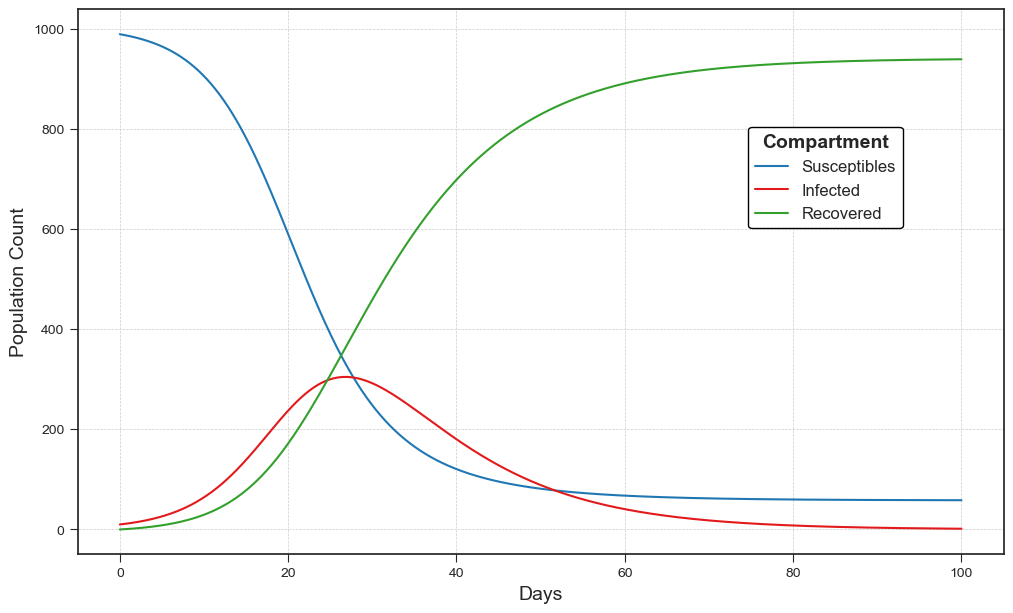

In [258]:
# EXAMPLE 1

N = 1000 #Total population
T = 100 #Total number of days to simulate
h = 1/10 #Step size for state computation
gamma = 0.1 #Recovery rate
beta = 0.3 #Infection rate 

#Initial conditions
I0 = 10
S0 = N - I0
R0 = 0

X0 = (S0, I0, R0)
params = (beta, gamma)

S,I,R = sir_model(N, T, h, X0, params)

# Plot the results
time = np.linspace(0,T,int(T/h))

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')

plt.plot(time, S, label='Susceptibles', color=colors[1])
plt.plot(time, I, label='Infected', color = colors[5])
plt.plot(time, R, label='Recovered', color=colors[3])

plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.legend(
    bbox_to_anchor=(0.9, 0.8), 
    fontsize=12, 
    title='Compartment', 
    title_fontproperties={'weight': 'bold', 'size': 14},
    frameon=True,                  
    fancybox=True,                 
    framealpha=1,                   
    edgecolor='black',              
    facecolor='white')
plt.tight_layout()
plt.xlabel('Days', fontsize=14)
plt.ylabel('Population Count', fontsize=14)

plt.show()

Following the same approach as above, we can also define an algorithm for our SEIR and SEIRDS models

In [169]:
def seir_model(N, T, h, X0, params):
    #Define total number of time steps, initial conditions and model parameters
    num_steps = int(T/h)
    S0, E0, I0, R0 = X0
    beta, gamma, sigma = params
    
    #Initialize state variables
    S = np.zeros(num_steps)
    E = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)
    
    S[0] = S0
    E[0] = E0
    I[0] = I0
    R[0] = R0    
    
    #Sequentially compute state values
    for t in range(1,num_steps):
        S[t] = S[t-1] + h*(-beta*S[t-1]*I[t-1]/N)
        E[t] = E[t-1] + h*(beta*S[t-1]*I[t-1]/N - sigma*E[t-1])
        I[t] = I[t-1] + h*(sigma*E[t-1] - gamma*I[t-1])
        R[t] = R[t-1] + h*(gamma*I[t-1])
    
    return S,E,I,R

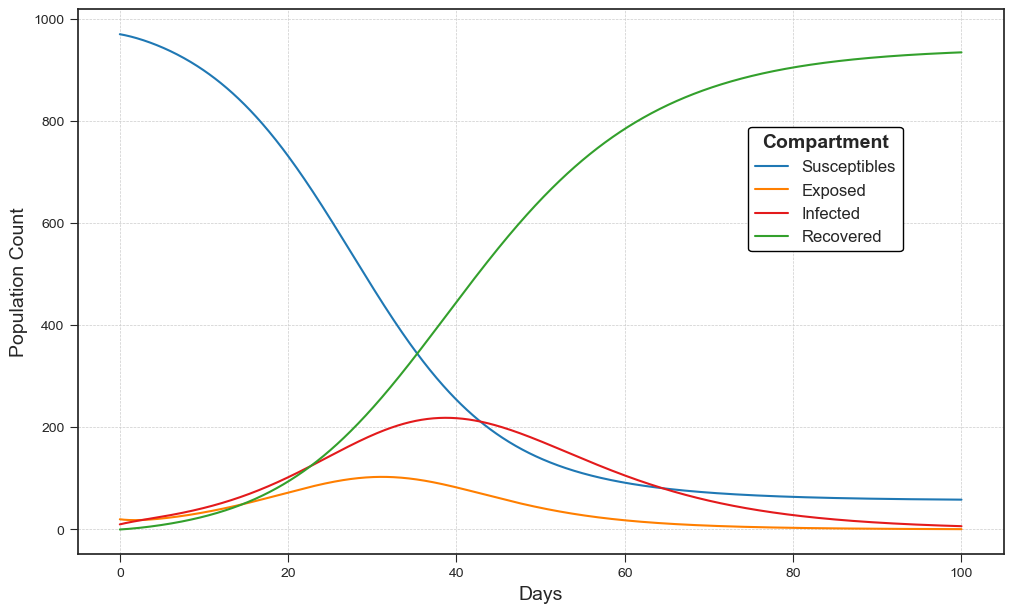

In [269]:
# EXAMPLE 2

N = 1000 #Total population
T = 100 #Total number of days to simulate
h = 1/10 #Step size for state computation
gamma = 0.1 #Recovery rate
beta = 0.3 #Infection rate
sigma = 0.25 #Latency rate 

#Initial conditions
I0 = 10
E0 = 20
S0 = N - I0 - E0
R0 = 0

X0 = (S0, E0, I0, R0)
params = (beta, gamma, sigma)

S,E,I,R = seir_model(N, T, h, X0, params)

#Plot the results
time = np.linspace(0,T,int(T/h))
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')
plt.figure(figsize=(10, 6))

plt.plot(time, S, label='Susceptibles', color=colors[1])
plt.plot(time, E, label='Exposed', color = colors[7])
plt.plot(time, I, label='Infected', color = colors[5])
plt.plot(time, R, label='Recovered', color=colors[3])

plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.legend(
    bbox_to_anchor=(0.9, 0.8), 
    fontsize=12, 
    title='Compartment', 
    title_fontproperties={'weight': 'bold', 'size': 14},
    frameon=True,                  
    fancybox=True,                 
    framealpha=1,                   
    edgecolor='black',              
    facecolor='white')
plt.tight_layout()
plt.xlabel('Days', fontsize=14)
plt.ylabel('Population Count', fontsize=14)

plt.show()

In [171]:
def seirds_model(N, T, h, X0, params):
    #Define total number of time steps, initial conditions and model parameters
    num_steps = int(T/h)
    S0, E0, I0, R0, D0 = X0
    alpha, beta, gamma, mu, sigma = params
    
    #Initialize state variables
    S = np.zeros(num_steps)
    E = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)
    D = np.zeros(num_steps)

    
    S[0] = S0
    E[0] = E0
    I[0] = I0
    R[0] = R0    
    D[0] = D0
    
    #Sequentially compute state values
    for t in range(1,num_steps):
        S[t] = S[t-1] + h*(-beta*S[t-1]*I[t-1]/N + alpha*R[t-1])
        E[t] = E[t-1] + h*(beta*S[t-1]*I[t-1]/N - sigma*E[t-1])
        I[t] = I[t-1] + h*(sigma*E[t-1] - gamma*I[t-1] - mu*I[t-1])
        R[t] = R[t-1] + h*(gamma*I[t-1] - alpha*R[t-1])
        D[t] = D[t-1] + h*(mu*I[t-1])
    
    return S,E,I,R,D

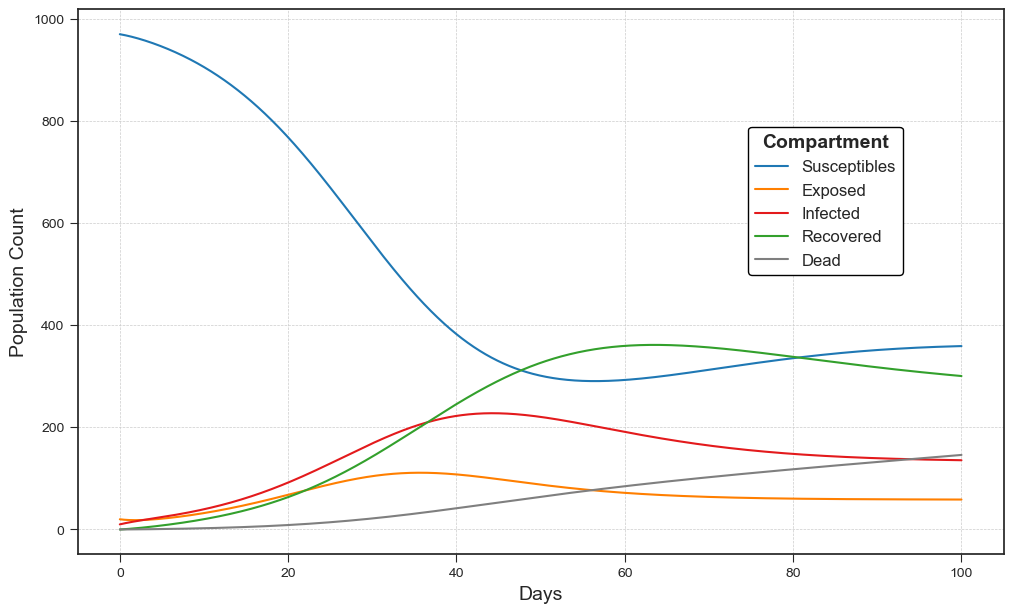

In [270]:
# EXAMPLE 3

N = 1000          #Total population
T = 100           #Total number of days to simulate
h = 1/10          #Step size for state computation
alpha = 1/20      #Reinfection rate
gamma = 0.1       #Recovery rate
beta = 0.3        #Infection rate
mu = 0.01         #Mortality Rate
sigma = 0.25      #Latency rate 

#Initial conditions
I0 = 10
E0 = 20
S0 = N - I0 - E0
R0 = 0
D0 = 0

X0 = (S0, E0, I0, R0, D0)
params = (alpha, beta, gamma, mu, sigma)

S,E,I,R,D = seirds_model(N, T, h, X0, params)

#Plot the results
time = np.linspace(0,T,int(T/h))
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')
plt.figure(figsize=(10, 6))

plt.plot(time, S, label='Susceptibles', color=colors[1])
plt.plot(time, E, label='Exposed', color = colors[7])
plt.plot(time, I, label='Infected', color = colors[5])
plt.plot(time, R, label='Recovered', color=colors[3])
plt.plot(time, D, label='Dead', color='#7f7f7f')


plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.legend(
    bbox_to_anchor=(0.9, 0.8), 
    fontsize=12, 
    title='Compartment', 
    title_fontproperties={'weight': 'bold', 'size': 14},
    frameon=True,                  
    fancybox=True,                 
    framealpha=1,                   
    edgecolor='black',              
    facecolor='white')
plt.tight_layout()
plt.xlabel('Days', fontsize=14)
plt.ylabel('Population Count', fontsize=14)
plt.show()

## The Effective Reproduction Number

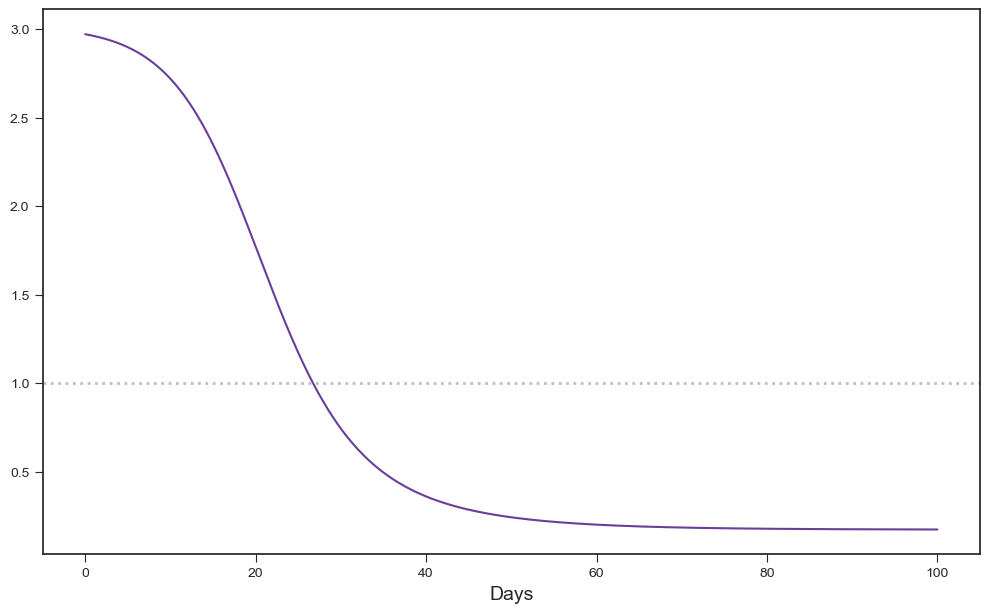

In [271]:
# Calculate the effective reproduction number from Example 1

N = 1000 #Total population
T = 100 #Total number of days to simulate
h = 1/10 #Step size for state computation
gamma = 0.1 #Recovery rate
beta = 0.3 #Infection rate 

#Initial conditions
I0 = 10
S0 = N - I0
R0 = 0

X0 = (S0, I0, R0)
params = (beta, gamma)
S,I,R = sir_model(N, T, h, X0, params)


R_0 = beta / gamma
R_T = R_0 * S / N

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')

plt.plot(time, R_T, color = colors[9])
plt.axhline(1, linestyle=':', linewidth=2, color=colors[8])

plt.tight_layout()
plt.xlabel('Days', fontsize=14)
plt.show()

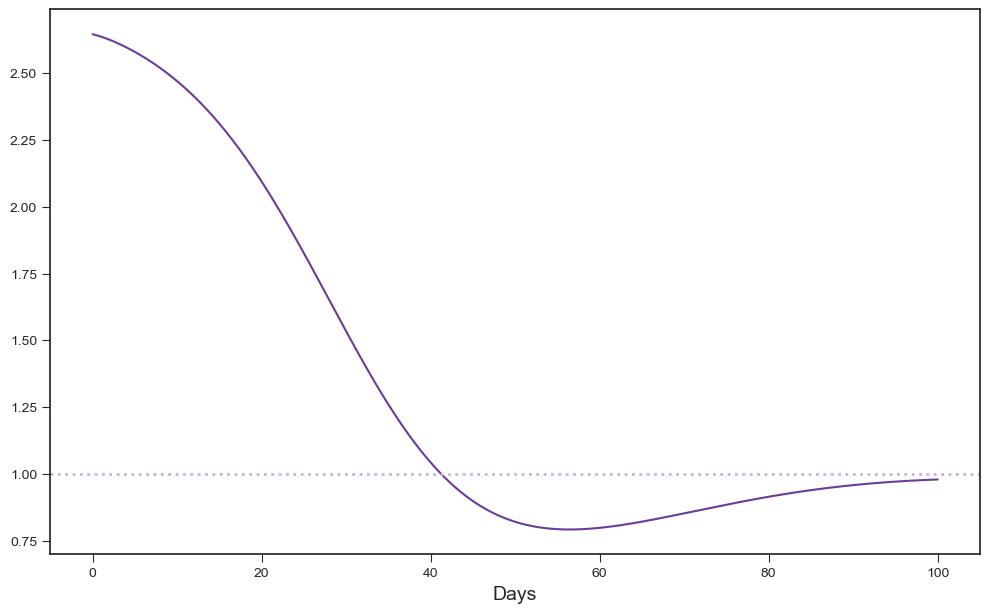

In [272]:
# Calculate the effective reproduction number from Example 3

N = 1000          #Total population
T = 100           #Total number of days to simulate
h = 1/10          #Step size for state computation
alpha = 1/20      #Reinfection rate
gamma = 0.1       #Recovery rate
beta = 0.3        #Infection rate
mu = 0.01         #Mortality Rate
sigma = 0.25      #Latency rate 

#Initial conditions
I0 = 10
E0 = 20
S0 = N - I0 - E0
R0 = 0
D0 = 0

X0 = (S0, E0, I0, R0, D0)
params = (alpha, beta, gamma, mu, sigma)

S,E,I,R,D = seirds_model(N, T, h, X0, params)

R_0 = beta/(gamma + mu)
R_T = R_0 * S/N

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')

plt.plot(time, R_T, color = colors[9])
plt.axhline(1, linestyle=':', linewidth=2, color=colors[8])

plt.tight_layout()
plt.xlabel('Days', fontsize=14)
plt.show()

## Stochastic Epidemic Models and Gillespi's Algorithm

In [273]:
def DTMC_SIR(N, beta, gamma, T, dt, S0, I0, R0):
    """
    Simulates the DTMC SIR model for an epidemic.

    Parameters:
    - N: Total population size
    - beta: Infection rate
    - gamma: Recovery rate
    - T: Total simulation time (in days)
    - dt: Time step (in days)
    - S0: Initial number of susceptible individuals
    - I0: Initial number of infected individuals
    - R0: Initial number of recovered individuals
    
    Returns:
    - S: Array of susceptible individuals over time
    - I: Array of infected individuals over time
    - R: Array of recovered individuals over time
    - time: Array of time points
    """
    
    num_steps = int(T/dt)

    # Initialize arrays to store the simulation results
    S = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)

    # Set initial conditions
    S[0] = S0
    I[0] = I0
    R[0] = R0

    # Simulate the epidemic over time
    for t in range(1, num_steps):
        if I[t-1] > 0:  # If there are infected individuals, continue the simulation
            # Calculate infection and recovery probabilities
            P_infection = beta * I[t-1] / N
            P_recovery = gamma

            # Determine the number of new infections and recoveries
            new_infections = np.random.binomial(S[t-1], P_infection * dt)
            new_recoveries = np.random.binomial(I[t-1], P_recovery * dt)

            # Update the state variables
            S[t] = S[t-1] - new_infections
            I[t] = I[t-1] + new_infections - new_recoveries
            R[t] = R[t-1] + new_recoveries
        else:
            # If no infected individuals, epidemic has ended
            S[t] = S[t-1]
            I[t] = I[t-1]
            R[t] = R[t-1]

    # Create a time array
    time = np.arange(0, T, dt)

    return S, I, R, time

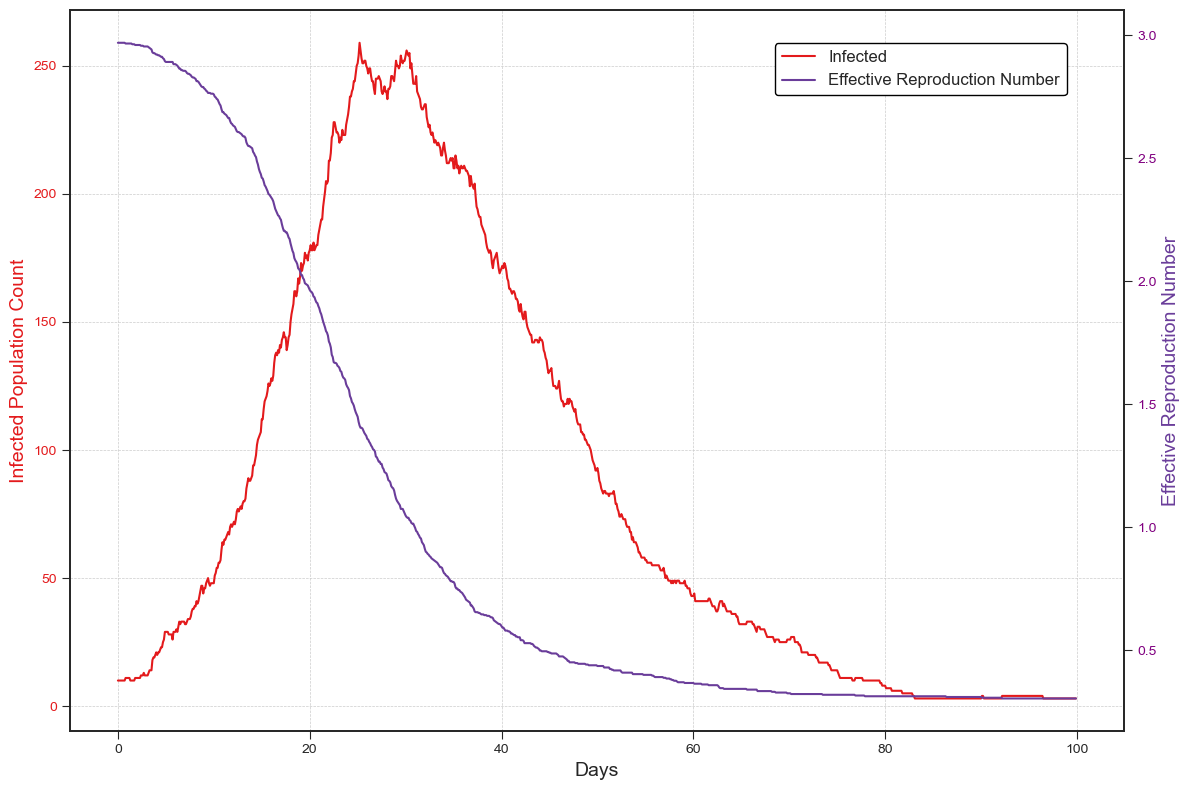

In [274]:
# Example 1

N = 1000         # Total population size
beta = 0.3       # Infection rate
gamma = 0.1      # Recovery rate
T = 100          # Total simulation time (in days)
dt = 0.1         # Time step (in days)
S0 = 990         # Initial number of susceptible individuals
I0 = 10          # Initial number of infected individuals
R0 = 0           # Initial number of recovered individuals

# Run the simulation
S, I, R, time = DTMC_SIR(N, beta, gamma, T, dt, S0, I0, R0)

RT = beta/gamma * S/N

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 8))
plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')

ax1.plot(time, I, label="Infected", color=colors[5])
ax1.set_xlabel('Days', fontsize=14)
ax1.set_ylabel('Infected Population Count', fontsize=14, color=colors[5])
ax1.tick_params(axis='y', labelcolor=colors[5])

# Create the second axis (right y-axis) for "RT"
ax2 = ax1.twinx()  # This creates a twin y-axis that shares the same x-axis
ax2.plot(time, RT, label="Effective Reproduction Number", color=colors[9])
ax2.set_ylabel('Effective Reproduction Number', fontsize=14, color=colors[9])
ax2.tick_params(axis='y', labelcolor='purple')

# Customize the plot
fig.legend(
    bbox_to_anchor=(0.9, 0.95), 
    fontsize=12, 
    title='',
    frameon=True,                  
    fancybox=True,                 
    framealpha=1,                   
    edgecolor='black',              
    facecolor='white')
plt.tight_layout()
plt.show()


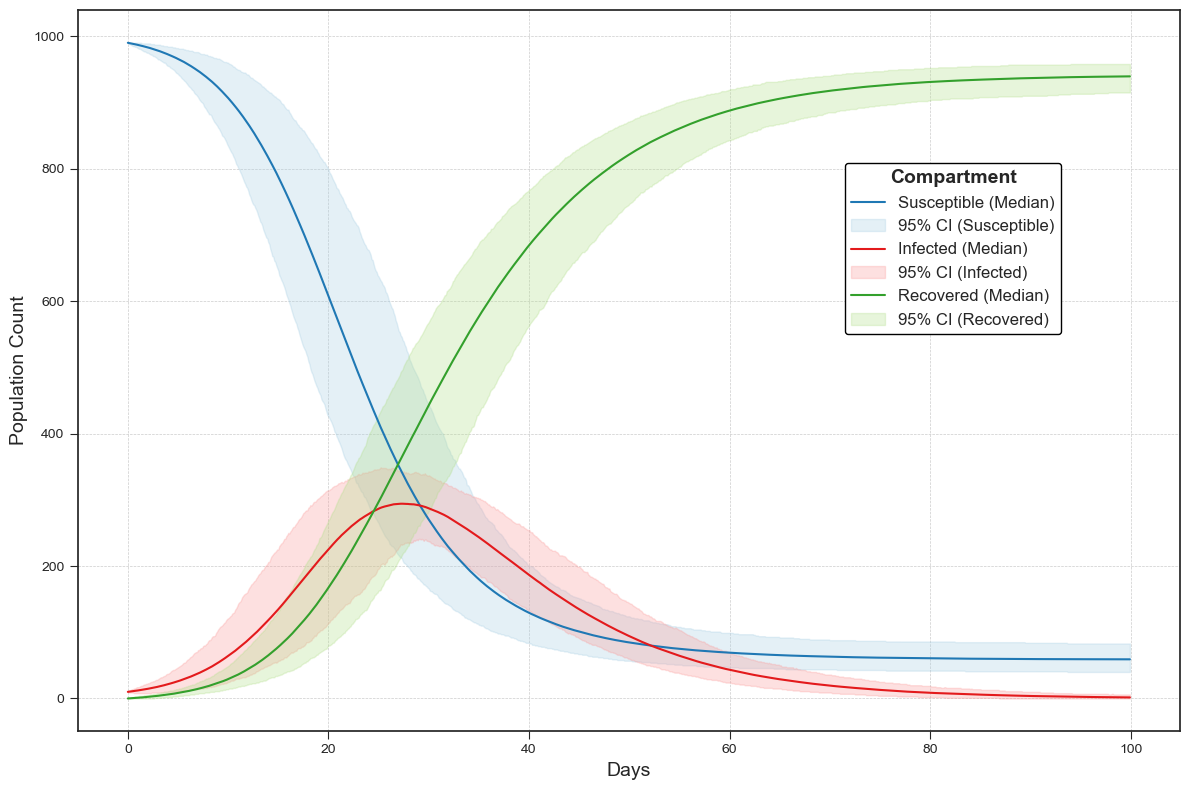

In [275]:
num_simulations = 1000
num_steps = int(T / dt)

# Initialize arrays to store the results of all simulations
S_simulations = np.zeros((num_simulations, num_steps))
I_simulations = np.zeros((num_simulations, num_steps))
R_simulations = np.zeros((num_simulations, num_steps))

# Run the simulations
for n in range(num_simulations):
    S, I, R, time = DTMC_SIR(N, beta, gamma, T, dt, S0, I0, R0)
    S_simulations[n, :] = S
    I_simulations[n, :] = I
    R_simulations[n, :] = R

# Calculate the median and confidence intervals for each time step
S_median = np.mean(S_simulations, axis=0)
S_lower = np.percentile(S_simulations, 2.5, axis=0)
S_upper = np.percentile(S_simulations, 97.5, axis=0)

I_median = np.mean(I_simulations, axis=0)
I_lower = np.percentile(I_simulations, 2.5, axis=0)
I_upper = np.percentile(I_simulations, 97.5, axis=0)

R_median = np.mean(R_simulations, axis=0)
R_lower = np.percentile(R_simulations, 2.5, axis=0)
R_upper = np.percentile(R_simulations, 97.5, axis=0)

# Plot the results
plt.figure(figsize=(12, 8))
plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')

# Plot the Susceptible population with confidence intervals

plt.plot(time, S_median, label="Susceptible (Median)", color=colors[1])
plt.fill_between(time, S_lower, S_upper, color=colors[0], alpha=0.3, label='95% CI (Susceptible)')

# Plot the Infected population with confidence intervals
plt.plot(time, I_median, label="Infected (Median)", color=colors[5])
plt.fill_between(time, I_lower, I_upper, color=colors[4], alpha=0.3, label='95% CI (Infected)')

# Plot the Recovered population with confidence intervals
plt.plot(time, R_median, label="Recovered (Median)", color=colors[3])
plt.fill_between(time, R_lower, R_upper, color=colors[2], alpha=0.3, label='95% CI (Recovered)')

# Customize the plot
plt.xlabel('Days', fontsize=14)
plt.ylabel('Population Count', fontsize=14)
plt.legend(
    bbox_to_anchor=(0.9, 0.8), 
    fontsize=12, 
    title='Compartment', 
    title_fontproperties={'weight': 'bold', 'size': 14},
    frameon=True,                  
    fancybox=True,                 
    framealpha=1,                   
    edgecolor='black',              
    facecolor='white')
plt.tight_layout()
plt.show()